In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,96531,98734,98734,98734,103902,105749,107957,109532,111592,111592
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132481,132484,132488,132490,132490,132496,132497,132499,132506,132509
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,134840,135219,135586,135821,136294,136679,137049,137403,137772,138113
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13839,13842,13842,13842,13864,13864,13873,13877,13882,13882
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,37289,37467,37604,37678,37748,37874,38002,38091,38371,38528


In [3]:
del df["Lat"]
del df["Long"]

In [4]:
countries_df = df[["Province/State","Country/Region"]]
countries_df.head()

,Province/State,Country/Region
0,NaN,Afghanistan
1,NaN,Albania
2,NaN,Algeria
3,NaN,Andorra
4,NaN,Angola


In [5]:
days_df = df.copy()
del days_df["Province/State"]
del days_df["Country/Region"]

In [6]:
days_df = days_df.stack().reset_index()
days_df.columns=["country_id", "date", "count"]
days_df.head()

,country_id,date,count
0,0,1/22/20,0
1,0,1/23/20,0
2,0,1/24/20,0
3,0,1/25/20,0
4,0,1/26/20,0


In [7]:
df = pd.merge(countries_df, days_df, left_index=True, right_on="country_id")
del df["country_id"]
df["date"] = pd.to_datetime(df["date"])
df.head()

,Province/State,Country/Region,date,count
0,NaN,Afghanistan,2020-01-22,0
1,NaN,Afghanistan,2020-01-23,0
2,NaN,Afghanistan,2020-01-24,0
3,NaN,Afghanistan,2020-01-25,0
4,NaN,Afghanistan,2020-01-26,0


In [8]:
global_df = df.groupby(["date"],as_index=False).sum("count")

In [9]:
global_df.tail()

,date,count
517,2021-06-22,179158296
518,2021-06-23,179595551
519,2021-06-24,179999388
520,2021-06-25,180421128
521,2021-06-26,180783947


In [10]:
latest_date_str = global_df.date.max().strftime("%Y-%m-%d")

In [11]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

In [12]:
df["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [13]:
#plt.figure(figsize=(9.5,5))
#plt.bar(global_df["date"],global_df["count"]/1000,label="positive")
#plt.legend()

In [14]:
trans = pd.DataFrame()
trans["date"] = global_df.iloc[1:]["date"]
trans["count1"] = global_df["count"].iloc[1:]
trans = trans.reset_index().drop(columns="index")
trans["count"] = trans["count1"] - global_df["count"].iloc[0:]
del trans["count1"]
trans["move_ave7"] = trans["count"].rolling(7).mean()


In [15]:
trans.tail()

,date,count,move_ave7
516,2021-06-22,372137.0,359184.571429
517,2021-06-23,437255.0,364715.428571
518,2021-06-24,403837.0,366334.714286
519,2021-06-25,421740.0,368590.714286
520,2021-06-26,362819.0,370786.714286


<IPython.core.display.Javascript object>


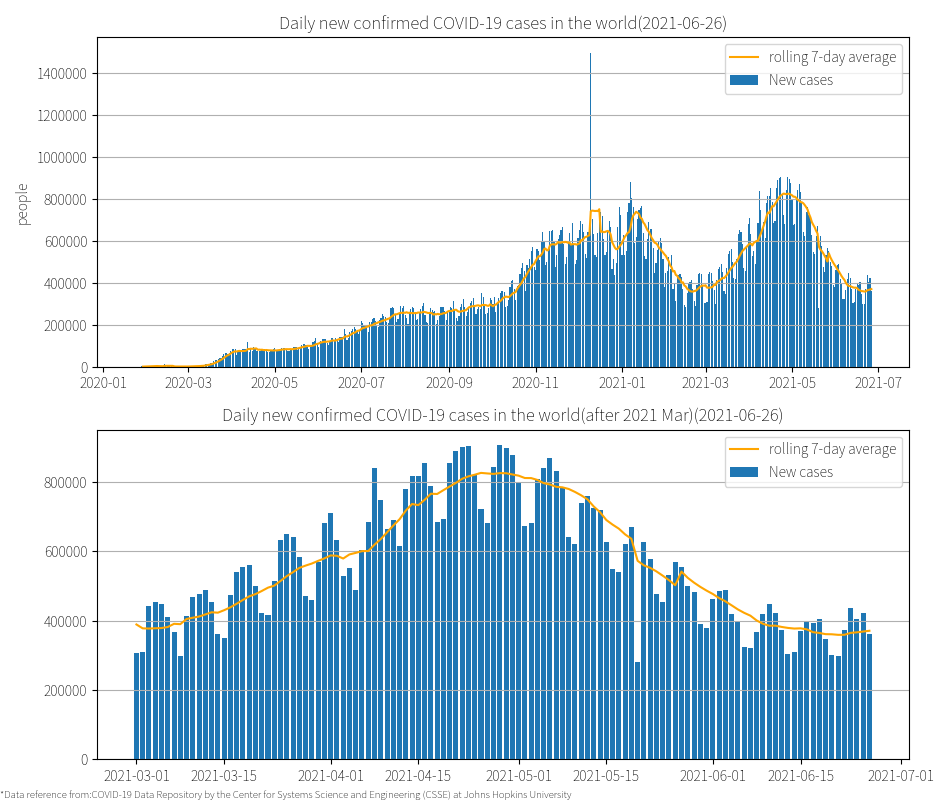

In [16]:
fig=plt.figure(figsize=(9.5,8))
plt.subplot(2,1,1) # (rows, columns, panel number)
plt.bar(trans["date"],trans["count"],label="New cases")
plt.plot_date(trans["date"],trans["move_ave7"],label="rolling 7-day average", fmt="-", color="orange")
plt.title("Daily new confirmed COVID-19 cases in the world({})".format(latest_date_str))
plt.ylabel("people")
plt.grid(axis="y")
plt.legend()

plt.subplot(2,1,2) # (rows, columns, panel number)
plt.title("Daily new confirmed COVID-19 cases in the world(after 2021 Mar)({})".format(latest_date_str))
chart_data = trans[trans.date >= "2021-03-01"]
plt.bar(chart_data["date"],chart_data["count"],label="New cases")
plt.plot_date(chart_data["date"],chart_data["move_ave7"],label="rolling 7-day average", fmt="-", color="orange")
plt.grid(axis="y")
plt.legend()
#plt.legend(bbox_to_anchor=(0, 1),loc='upper left', fontsize=9)
fig.text(0,0
         ,"*Data reference from:COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University",
        fontsize=7,ha="left",va="bottom")

fig.tight_layout()

In [17]:
fig.savefig("out/covid-global-transition.png")

## 国別

In [18]:
df.tail()

,Province/State,Country/Region,date,count
145633,NaN,Zimbabwe,2021-06-22,42714
145634,NaN,Zimbabwe,2021-06-23,43480
145635,NaN,Zimbabwe,2021-06-24,44306
145636,NaN,Zimbabwe,2021-06-25,45217
145637,NaN,Zimbabwe,2021-06-26,46018


### 中国の合計行を追加する

In [19]:
china_sum = df[df["Country/Region"]=="China"].groupby("date", as_index=False).sum("count")
china_sum

,date,count
0,2020-01-22,548
1,2020-01-23,643
2,2020-01-24,920
3,2020-01-25,1406
4,2020-01-26,2075
...,...,...
517,2021-06-22,103602
518,2021-06-23,103620
519,2021-06-24,103651
520,2021-06-25,103680


In [20]:
import numpy as np
china_sum.insert(0,"Country/Region","China")
china_sum.insert(0,"Province/State",np.nan)
china_sum

,Province/State,Country/Region,date,count
0,NaN,China,2020-01-22,548
1,NaN,China,2020-01-23,643
2,NaN,China,2020-01-24,920
3,NaN,China,2020-01-25,1406
4,NaN,China,2020-01-26,2075
...,...,...,...,...
517,NaN,China,2021-06-22,103602
518,NaN,China,2021-06-23,103620
519,NaN,China,2021-06-24,103651
520,NaN,China,2021-06-25,103680


In [21]:
df = pd.concat([df,china_sum])

### 国別新規陽性者数

In [22]:
trans = df.copy()
trans["inc_count"] = trans["count"].diff()
# 最小の日付は一律ゼロにする
trans.loc[trans["date"]==trans["date"].min(),"inc_count"] = 0

In [23]:
## 異常値？の訂正
import numpy as np
trans.loc[(trans["Country/Region"]=="France") & (trans.inc_count < -300000),"inc_count"]=np.nan

#### 移動平均

In [24]:
# "Province/State"と"Country/Region"の結合列を作ってユニークにする
trans["country_key"]=trans["Province/State"].fillna("NA")+"-"+trans["Country/Region"]
if trans["country_key"].isna().any():
    raise Exception("include NaN")
for k in trans.country_key.unique():
    print(k,end=",")
    trans.loc[trans.country_key==k,"cnt_move_ave7"] = trans.loc[trans.country_key==k,"count"].rolling(7).mean()
    trans.loc[trans.country_key==k,"inc_move_ave7"] = trans.loc[trans.country_key==k,"inc_count"].rolling(7).mean()

pd.concat([trans[trans.country_key=="NA-Afghanistan"].tail(3),trans[trans.country_key=="NA-Albania"].head(3)])

NA-Afghanistan,NA-Albania,NA-Algeria,NA-Andorra,NA-Angola,NA-Antigua and Barbuda,NA-Argentina,NA-Armenia,Australian Capital Territory-Australia,New South Wales-Australia,Northern Territory-Australia,Queensland-Australia,South Australia-Australia,Tasmania-Australia,Victoria-Australia,Western Australia-Australia,NA-Austria,NA-Azerbaijan,NA-Bahamas,NA-Bahrain,NA-Bangladesh,NA-Barbados,NA-Belarus,NA-Belgium,NA-Belize,NA-Benin,NA-Bhutan,NA-Bolivia,NA-Bosnia and Herzegovina,NA-Botswana,NA-Brazil,NA-Brunei,NA-Bulgaria,NA-Burkina Faso,NA-Burma,NA-Burundi,NA-Cabo Verde,NA-Cambodia,NA-Cameroon,Alberta-Canada,British Columbia-Canada,Diamond Princess-Canada,Grand Princess-Canada,Manitoba-Canada,New Brunswick-Canada,Newfoundland and Labrador-Canada,Northwest Territories-Canada,Nova Scotia-Canada,Nunavut-Canada,Ontario-Canada,Prince Edward Island-Canada,Quebec-Canada,Repatriated Travellers-Canada,Saskatchewan-Canada,Yukon-Canada,NA-Central African Republic,NA-Chad,NA-Chile,Anhui-China,Beijing-China,

,Province/State,Country/Region,date,count,inc_count,country_key,cnt_move_ave7,inc_move_ave7
519,NaN,Afghanistan,2021-06-24,109532,1575.0,NA-Afghanistan,103334.571429,1857.285714
520,NaN,Afghanistan,2021-06-25,111592,2060.0,NA-Afghanistan,105171.428571,1836.857143
521,NaN,Afghanistan,2021-06-26,111592,0.0,NA-Afghanistan,107008.285714,1836.857143
522,NaN,Albania,2020-01-22,0,0.0,NA-Albania,NaN,NaN
523,NaN,Albania,2020-01-23,0,0.0,NA-Albania,NaN,NaN
524,NaN,Albania,2020-01-24,0,0.0,NA-Albania,NaN,NaN


In [25]:
trans["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

## 人口当たり

In [26]:
pop = pd.read_excel("world-data/WPP2019_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx",header=16)
pop_latest = pop.loc[pop["Type"]=="Country/Area"][[pop.columns[2],pop.columns[-1]]]
pop_latest.columns = ["un_country","population"]
pop_latest.head(1)

,un_country,population
26,Burundi,11890.781


### 名称変換

In [27]:
alternates = pd.DataFrame([
    ("US","United States of America"),
    ("Russia","Russian Federation"),
    ("Iran","Iran (Islamic Republic of)"),
    ("Bolivia","Bolivia (Plurinational State of)"),
    ("Moldova","Republic of Moldova"),
    ("Venezuela","Venezuela (Bolivarian Republic of)"),
    ("Korea, South","Republic of Korea"),
    ("Congo (Kinshasa)","Democratic Republic of the Congo"),
    ("Congo (Brazzaville)","Congo"),
    ("Vietnam","Viet Nam"),
    ("Laos","Lao People's Democratic Republic"),
    ("Taiwan*","China, Taiwan Province of China"),
    ("Tanzania","United Republic of Tanzania"),
    ("Brunei","Brunei Darussalam"),
    ("Micronesia","Micronesia (Fed. States of)"),
    ("Syria","Syrian Arab Republic"),
], columns = ["covid_country","un_country"])

In [28]:
alternates.head(2)

,covid_country,un_country
0,US,United States of America
1,Russia,Russian Federation


In [29]:
trans_pop = pd.merge(trans, alternates, left_on="Country/Region", right_on="covid_country", how="left")
del trans_pop["covid_country"]
trans_pop.rename(columns={"Country/Region":"country"},inplace=True)

In [30]:
trans_pop.head()

,Province/State,country,date,count,inc_count,country_key,cnt_move_ave7,inc_move_ave7,un_country
0,NaN,Afghanistan,2020-01-22,0,0.0,NA-Afghanistan,NaN,NaN,NaN
1,NaN,Afghanistan,2020-01-23,0,0.0,NA-Afghanistan,NaN,NaN,NaN
2,NaN,Afghanistan,2020-01-24,0,0.0,NA-Afghanistan,NaN,NaN,NaN
3,NaN,Afghanistan,2020-01-25,0,0.0,NA-Afghanistan,NaN,NaN,NaN
4,NaN,Afghanistan,2020-01-26,0,0.0,NA-Afghanistan,NaN,NaN,NaN


In [31]:
trans_pop.isnull().any(axis=0)

Province/State     True
country           False
date              False
count             False
inc_count          True
country_key       False
cnt_move_ave7      True
inc_move_ave7      True
un_country         True
dtype: bool

In [32]:
trans_pop["un_country"].fillna(trans_pop["country"],inplace=True)

In [33]:
trans_pop.isnull().any(axis=0)

Province/State     True
country           False
date              False
count             False
inc_count          True
country_key       False
cnt_move_ave7      True
inc_move_ave7      True
un_country        False
dtype: bool

In [34]:
trans_pop = pd.merge(trans_pop, pop_latest, on="un_country", how="left")

In [35]:
trans_pop.head()

,Province/State,country,date,count,inc_count,country_key,cnt_move_ave7,inc_move_ave7,un_country,population
0,NaN,Afghanistan,2020-01-22,0,0.0,NA-Afghanistan,NaN,NaN,Afghanistan,38928.341
1,NaN,Afghanistan,2020-01-23,0,0.0,NA-Afghanistan,NaN,NaN,Afghanistan,38928.341
2,NaN,Afghanistan,2020-01-24,0,0.0,NA-Afghanistan,NaN,NaN,Afghanistan,38928.341
3,NaN,Afghanistan,2020-01-25,0,0.0,NA-Afghanistan,NaN,NaN,Afghanistan,38928.341
4,NaN,Afghanistan,2020-01-26,0,0.0,NA-Afghanistan,NaN,NaN,Afghanistan,38928.341


In [36]:
trans_pop["count_per_mil_pop"] = trans_pop["count"] / (trans_pop["population"] / 1000)
trans_pop["inc_count_per_mil_pop"] = trans_pop["inc_count"] / (trans_pop["population"] / 1000)
trans_pop["cnt_move_ave7_milpop"] = trans_pop["cnt_move_ave7"] / (trans_pop["population"] / 1000)
trans_pop["inc_move_ave7_milpop"] = trans_pop["inc_move_ave7"] / (trans_pop["population"] / 1000)

In [37]:
pd.concat([trans_pop.head(),trans_pop.tail()])

,Province/State,country,date,count,inc_count,country_key,cnt_move_ave7,inc_move_ave7,un_country,population,count_per_mil_pop,inc_count_per_mil_pop,cnt_move_ave7_milpop,inc_move_ave7_milpop
0,NaN,Afghanistan,2020-01-22,0,0.0,NA-Afghanistan,NaN,NaN,Afghanistan,38928.341,0.0,0.0,NaN,NaN
1,NaN,Afghanistan,2020-01-23,0,0.0,NA-Afghanistan,NaN,NaN,Afghanistan,38928.341,0.0,0.0,NaN,NaN
2,NaN,Afghanistan,2020-01-24,0,0.0,NA-Afghanistan,NaN,NaN,Afghanistan,38928.341,0.0,0.0,NaN,NaN
3,NaN,Afghanistan,2020-01-25,0,0.0,NA-Afghanistan,NaN,NaN,Afghanistan,38928.341,0.0,0.0,NaN,NaN
4,NaN,Afghanistan,2020-01-26,0,0.0,NA-Afghanistan,NaN,NaN,Afghanistan,38928.341,0.0,0.0,NaN,NaN
146155,NaN,China,2021-06-22,103602,31.0,NA-China,103521.857143,25.428571,China,1439323.774,71.979635,0.021538,71.923954,0.017667
146156,NaN,China,2021-06-23,103620,18.0,NA-China,103547.000000,25.142857,China,1439323.774,71.992141,0.012506,71.941423,0.017469
146157,NaN,China,2021-06-24,103651,31.0,NA-China,103573.285714,26.285714,China,1439323.774,72.013679,0.021538,71.959685,0.018263
146158,NaN,China,2021-06-25,103680,29.0,NA-China,103598.857143,25.571429,China,1439323.774,72.033827,0.020148,71.977452,0.017766
146159,NaN,China,2021-06-26,103696,16.0,NA-China,103623.285714,24.428571,China,1439323.774,72.044944,0.011116,71.994424,0.016972


In [38]:
trans_pop.loc[trans_pop["country"]=="Japan"].tail()


,Province/State,country,date,count,inc_count,country_key,cnt_move_ave7,inc_move_ave7,un_country,population,count_per_mil_pop,inc_count_per_mil_pop,cnt_move_ave7_milpop,inc_move_ave7_milpop
81427,NaN,Japan,2021-06-22,788009,1443.0,NA-Japan,784067.857143,1432.857143,Japan,126476.458,6230.479668,11.409238,6199.318589,11.329042
81428,NaN,Japan,2021-06-23,789787,1778.0,NA-Japan,785509.428571,1441.571429,Japan,126476.458,6244.53762,14.057952,6210.716532,11.397943
81429,NaN,Japan,2021-06-24,791452,1665.0,NA-Japan,786968.142857,1458.714286,Japan,126476.458,6257.702125,13.164505,6222.250016,11.533485
81430,NaN,Japan,2021-06-25,793179,1727.0,NA-Japan,788439.857143,1471.714286,Japan,126476.458,6271.35684,13.654715,6233.886287,11.636271
81431,NaN,Japan,2021-06-26,794805,1626.0,NA-Japan,789928.571429,1488.714286,Japan,126476.458,6284.212988,12.856148,6245.65697,11.770683


### 主要国の定義

In [39]:
"""
countries = pd.DataFrame({"country":[
    "Japan",
    "US",
    "India",
    "Sweden",
    "Brazil",
    "Israel",
    "United Kingdom",
    "France",
    "Russia",
]})
"""
countries = pd.DataFrame([
    ("Japan",""),
    ("US",""),
    ("India","20210415"),
    ("Sweden","20210511"),
    ("Brazil",""),
    ("Israel","20210315"),
    ("United Kingdom",""),
    ("France","20210425"),
    ("Russia",""),
],columns=["country","text_disp_date"])

In [40]:
#c_df = pd.merge(countries, trans_pop[trans_pop["Province/State"].isna()], left_on="country", right_on="Country/Region", how="inner")[["country","date","count","inc_count","move_ave7"]]
c_trans = pd.merge(countries, trans_pop[trans_pop["Province/State"].isna()], on="country", how="inner")


In [41]:
c_trans

,country,text_disp_date,Province/State,date,count,inc_count,country_key,cnt_move_ave7,inc_move_ave7,un_country,population,count_per_mil_pop,inc_count_per_mil_pop,cnt_move_ave7_milpop,inc_move_ave7_milpop
0,Japan,,NaN,2020-01-22,2,0.0,NA-Japan,NaN,NaN,Japan,126476.458,0.015813,0.0,NaN,NaN
1,Japan,,NaN,2020-01-23,2,0.0,NA-Japan,NaN,NaN,Japan,126476.458,0.015813,0.0,NaN,NaN
2,Japan,,NaN,2020-01-24,2,0.0,NA-Japan,NaN,NaN,Japan,126476.458,0.015813,0.0,NaN,NaN
3,Japan,,NaN,2020-01-25,2,0.0,NA-Japan,NaN,NaN,Japan,126476.458,0.015813,0.0,NaN,NaN
4,Japan,,NaN,2020-01-26,4,2.0,NA-Japan,NaN,NaN,Japan,126476.458,0.031626,0.015813,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4693,Russia,,NaN,2021-06-22,5288766,16438.0,NA-Russia,5.238100e+06,16102.142857,Russian Federation,145934.46,36240.693254,112.639605,35893.510004,110.338181
4694,Russia,,NaN,2021-06-23,5306069,17303.0,NA-Russia,5.254787e+06,16687.000000,Russian Federation,145934.46,36359.260177,118.566924,36007.855855,114.345851
4695,Russia,,NaN,2021-06-24,5325940,19871.0,NA-Russia,5.272333e+06,17546.142857,Russian Federation,145934.46,36495.424042,136.163864,36128.088889,120.233034
4696,Russia,,NaN,2021-06-25,5346005,20065.0,NA-Russia,5.290310e+06,17976.714286,Russian Federation,145934.46,36632.91727,137.493228,36251.272367,123.183478


In [42]:
dates = trans["date"].unique()
len(dates)

522

In [43]:
c_trans[c_trans["country"]=="Japan"].tail()

,country,text_disp_date,Province/State,date,count,inc_count,country_key,cnt_move_ave7,inc_move_ave7,un_country,population,count_per_mil_pop,inc_count_per_mil_pop,cnt_move_ave7_milpop,inc_move_ave7_milpop
517,Japan,,NaN,2021-06-22,788009,1443.0,NA-Japan,784067.857143,1432.857143,Japan,126476.458,6230.479668,11.409238,6199.318589,11.329042
518,Japan,,NaN,2021-06-23,789787,1778.0,NA-Japan,785509.428571,1441.571429,Japan,126476.458,6244.53762,14.057952,6210.716532,11.397943
519,Japan,,NaN,2021-06-24,791452,1665.0,NA-Japan,786968.142857,1458.714286,Japan,126476.458,6257.702125,13.164505,6222.250016,11.533485
520,Japan,,NaN,2021-06-25,793179,1727.0,NA-Japan,788439.857143,1471.714286,Japan,126476.458,6271.35684,13.654715,6233.886287,11.636271
521,Japan,,NaN,2021-06-26,794805,1626.0,NA-Japan,789928.571429,1488.714286,Japan,126476.458,6284.212988,12.856148,6245.65697,11.770683


In [44]:
print(any(c_trans["date"].isnull()))
print(any(c_trans["date"].isna()))

False
False


In [45]:
c_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4698 entries, 0 to 4697
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   country                4698 non-null   object        
 1   text_disp_date         4698 non-null   object        
 2   Province/State         0 non-null      object        
 3   date                   4698 non-null   datetime64[ns]
 4   count                  4698 non-null   int64         
 5   inc_count              4697 non-null   float64       
 6   country_key            4698 non-null   object        
 7   cnt_move_ave7          4644 non-null   float64       
 8   inc_move_ave7          4637 non-null   float64       
 9   un_country             4698 non-null   object        
 10  population             4698 non-null   object        
 11  count_per_mil_pop      4698 non-null   object        
 12  inc_count_per_mil_pop  4697 non-null   object        
 13  cnt

### 東アジア

In [46]:
# 東Asia 主要国
e_asia_c = pd.DataFrame([
    ("Japan",""),
    ("China",""),
    ("Taiwan*",""),
    ("Korea, South","20210420"),
    ("Indonesia",""),
    ("Philippines",""),
    ("Vietnam",""),
],columns=["country","text_disp_date"])
e_asia_c

,country,text_disp_date
0,Japan,
1,China,
2,Taiwan*,
3,"Korea, South",20210420
4,Indonesia,
5,Philippines,
6,Vietnam,


In [47]:
e_a_trans = pd.merge(e_asia_c, trans_pop[trans_pop["Province/State"].isna()], on="country", how="inner")
e_a_trans

,country,text_disp_date,Province/State,date,count,inc_count,country_key,cnt_move_ave7,inc_move_ave7,un_country,population,count_per_mil_pop,inc_count_per_mil_pop,cnt_move_ave7_milpop,inc_move_ave7_milpop
0,Japan,,NaN,2020-01-22,2,0.0,NA-Japan,NaN,NaN,Japan,126476.458,0.015813,0.0,NaN,NaN
1,Japan,,NaN,2020-01-23,2,0.0,NA-Japan,NaN,NaN,Japan,126476.458,0.015813,0.0,NaN,NaN
2,Japan,,NaN,2020-01-24,2,0.0,NA-Japan,NaN,NaN,Japan,126476.458,0.015813,0.0,NaN,NaN
3,Japan,,NaN,2020-01-25,2,0.0,NA-Japan,NaN,NaN,Japan,126476.458,0.015813,0.0,NaN,NaN
4,Japan,,NaN,2020-01-26,4,2.0,NA-Japan,NaN,NaN,Japan,126476.458,0.031626,0.015813,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,Vietnam,,NaN,2021-06-22,13782,252.0,NA-Vietnam,12857.142857,354.000000,Viet Nam,97338.583,141.588254,2.588901,132.086809,3.63679
3650,Vietnam,,NaN,2021-06-23,13989,207.0,NA-Vietnam,13170.714286,313.571429,Viet Nam,97338.583,143.714851,2.126598,135.30826,3.221451
3651,Vietnam,,NaN,2021-06-24,14323,334.0,NA-Vietnam,13481.142857,310.428571,Viet Nam,97338.583,147.146173,3.431322,138.497423,3.189163
3652,Vietnam,,NaN,2021-06-25,14537,214.0,NA-Vietnam,13771.000000,289.857143,Viet Nam,97338.583,149.344685,2.198512,141.475246,2.977824


In [48]:
e_a_trans.count()

country                  3654
text_disp_date           3654
Province/State              0
date                     3654
count                    3654
inc_count                3654
country_key              3654
cnt_move_ave7            3612
inc_move_ave7            3612
un_country               3654
population               3654
count_per_mil_pop        3654
inc_count_per_mil_pop    3654
cnt_move_ave7_milpop     3612
inc_move_ave7_milpop     3612
dtype: int64

## チャート化

<IPython.core.display.Javascript object>


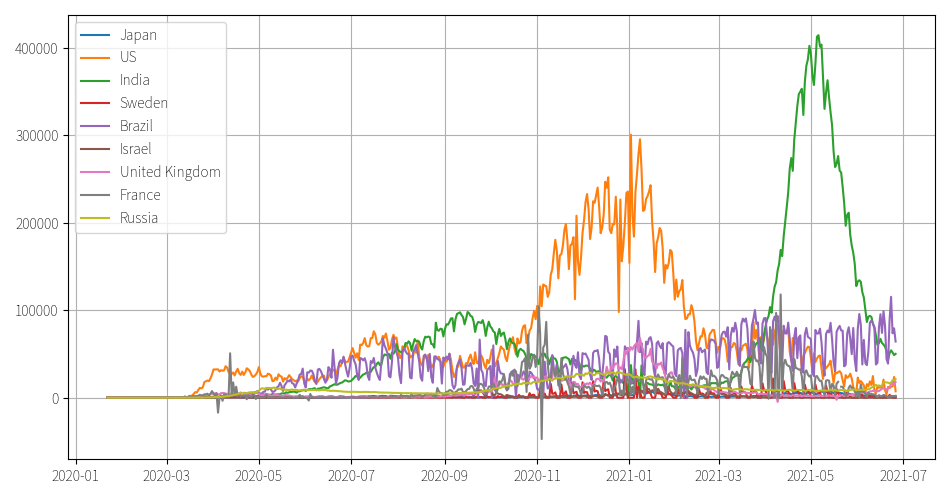

Japan
US
India
Sweden
Brazil
Israel
United Kingdom
France
Russia


In [49]:
# 主要国　新規感染者数　全期間
plt.figure(figsize=(9.5,5))
plt.grid()
dates = c_trans["date"].unique()
for c in countries["country"]:
    print(c)
    plt.plot_date(dates,c_trans.loc[c_trans["country"]==c]["inc_count"],label=c, fmt="-")
plt.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


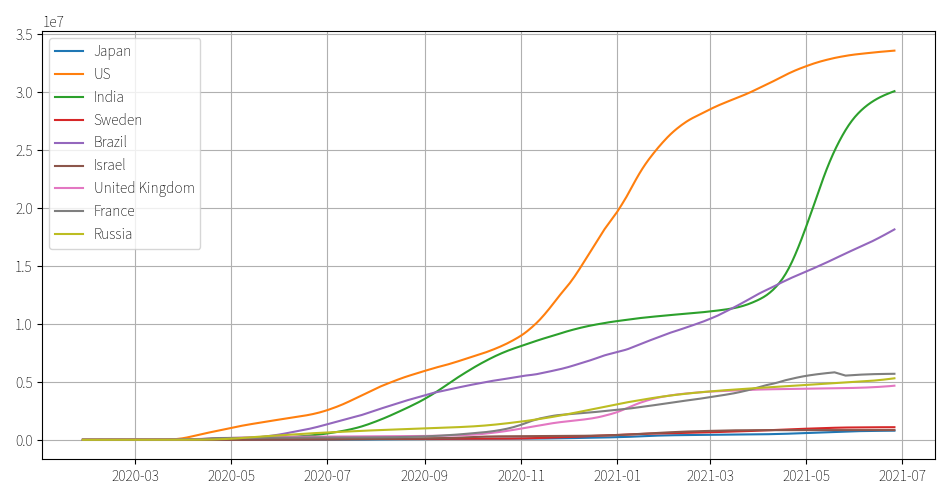

Japan
US
India
Sweden
Brazil
Israel
United Kingdom
France
Russia


In [50]:
# 主要国　新規感染者数７日間移動平均　全期間
plt.figure(figsize=(9.5,5))
plt.grid()
dates = c_trans["date"].unique()
for c in countries["country"]:
    print(c)
    plt.plot_date(dates,c_trans.loc[c_trans["country"]==c]["cnt_move_ave7"],label=c, fmt="-")
plt.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


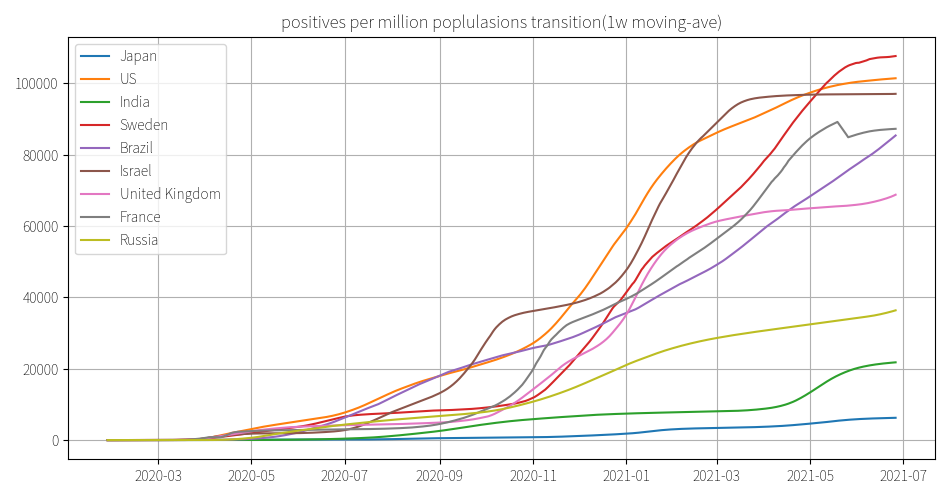

In [51]:
# 主要国　１００万人あたり感染者数累計 全期間　７日間移動平均
plt.figure(figsize=(9.5,5))
plt.grid()
plt.title("positives per million poplulasions transition(1w moving-ave)")
dates = c_trans["date"].unique()
for c in countries["country"]:
    plt.plot_date(dates,c_trans.loc[c_trans["country"]==c]["cnt_move_ave7_milpop"],label=c, fmt="-")
    
plt.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


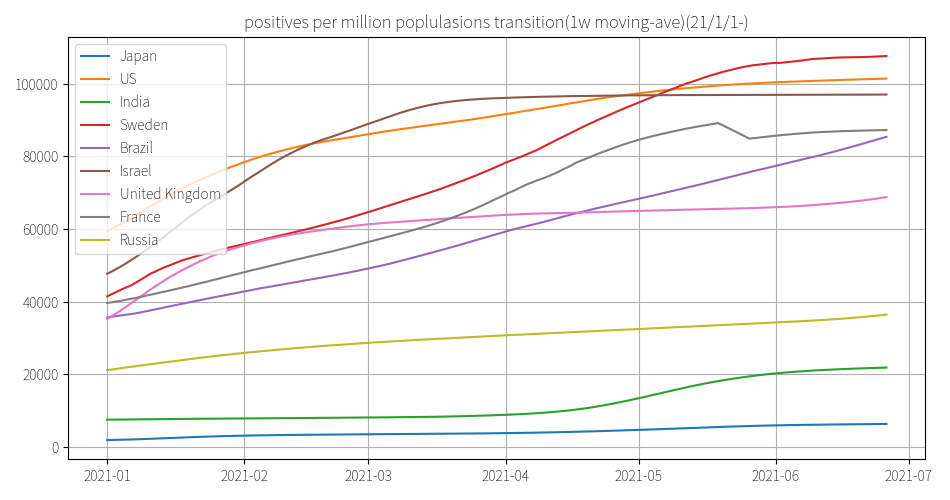

In [52]:
# 主要国　１００万人あたり感染者数累計 1月以降　７日間移動平均
plt.figure(figsize=(9.5,5))
plt.grid()
plt.title("positives per million poplulasions transition(1w moving-ave)(21/1/1-)")
dates = c_trans.loc[c_trans["date"]>="2021-01-01"]["date"].unique()
for c in countries["country"]:
    plt.plot_date(dates,c_trans.loc[(c_trans["country"]==c) & (c_trans["date"]>="2021-01-01")]["cnt_move_ave7_milpop"],label=c, fmt="-")
    
plt.legend()
plt.tight_layout()

## 人口当たりの新規感染者数

In [53]:
# 主要国　１００万人あたり新規感染者数 全期間　７日間移動平均
"""
plt.figure(figsize=(9.5,5))
plt.grid()
plt.title("increase positives per million poplulasions transition(1w moving-ave)")
dates = c_trans["date"].unique()
for c in countries["country"]:
    plt.plot_date(dates,c_trans.loc[c_trans["country"]==c]["inc_move_ave7_milpop"],label=c, fmt="-")
    plt.text(dates.max(),c_trans.loc[(c_trans["country"]==c) & (c_trans["date"]==dates.max())]["inc_move_ave7_milpop"],c,fontsize=8)

plt.legend()
plt.tight_layout()
"""

'\nplt.figure(figsize=(9.5,5))\nplt.grid()\nplt.title("increase positives per million poplulasions transition(1w moving-ave)")\ndates = c_trans["date"].unique()\nfor c in countries["country"]:\n    plt.plot_date(dates,c_trans.loc[c_trans["country"]==c]["inc_move_ave7_milpop"],label=c, fmt="-")\n    plt.text(dates.max(),c_trans.loc[(c_trans["country"]==c) & (c_trans["date"]==dates.max())]["inc_move_ave7_milpop"],c,fontsize=8)\n\nplt.legend()\nplt.tight_layout()\n'

## 人口100万人当たりの新規感染者数（3月以降）

<IPython.core.display.Javascript object>


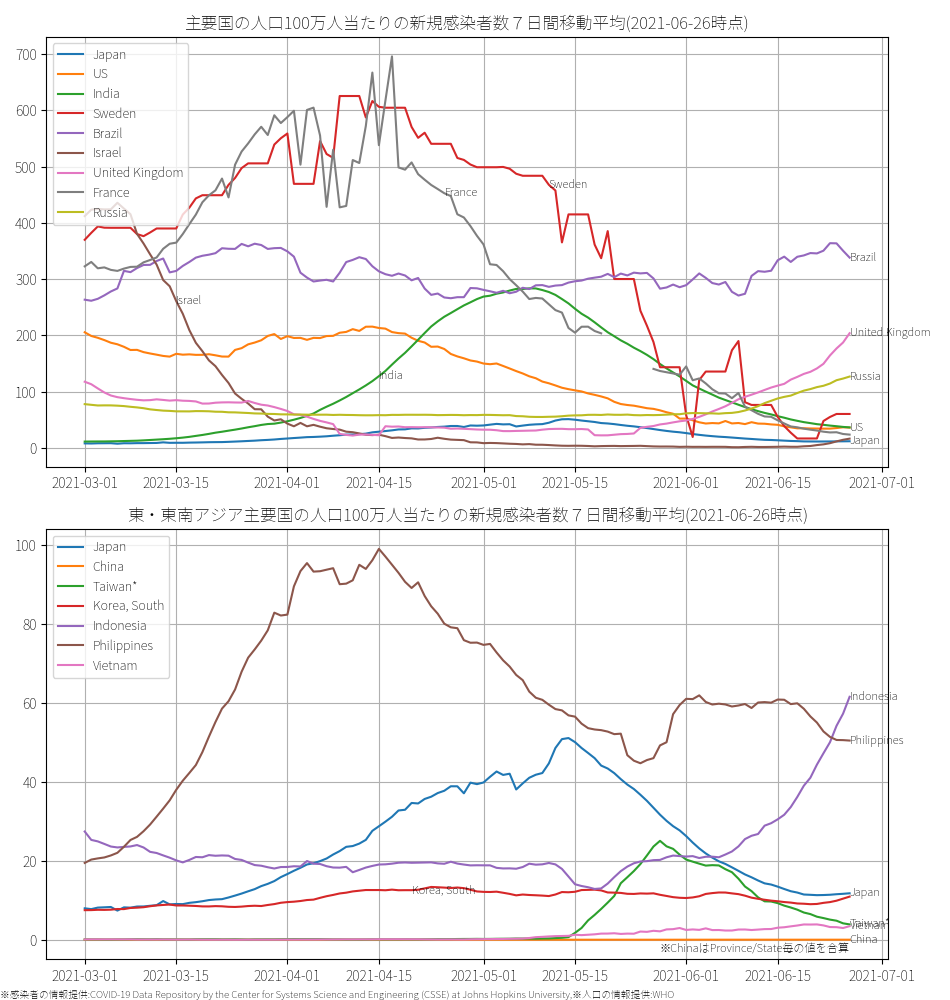

In [54]:
# 主要国　１００万人あたり感染者数累計 3月以降　７日間移動平均
fig=plt.figure(figsize=(9.5,10))
plt.subplot(2,1,1) # (rows, columns, panel number)
plt.grid()
plt.title("主要国の人口100万人当たりの新規感染者数７日間移動平均({}時点)".format(latest_date_str))
chart_data = c_trans[c_trans.date >= "2021-03-01"]
dates = chart_data["date"].unique()
for i,cr in countries.iterrows():
    c = cr["country"]
    text_disp_date = pd.to_datetime(cr["text_disp_date"]) if cr["text_disp_date"]!="" else dates.max()
    plt.plot_date(dates,chart_data.loc[chart_data["country"]==c]["inc_move_ave7_milpop"],label=c, fmt="-")
#    plt.text(dates.max(),chart_data.loc[(chart_data["country"]==c) & (chart_data["date"]==dates.max())]["inc_move_ave7_milpop"],c
    plt.text(text_disp_date,chart_data.loc[(chart_data["country"]==c) & (chart_data["date"]==text_disp_date)]["inc_move_ave7_milpop"],c
            ,fontsize=8,va="center")
plt.legend(bbox_to_anchor=(0, 1),loc='upper left', fontsize=9)

plt.subplot(2,1,2) # (rows, columns, panel number)
plt.grid()
plt.title("東・東南アジア主要国の人口100万人当たりの新規感染者数７日間移動平均({}時点)".format(latest_date_str))
chart_data = e_a_trans[e_a_trans.date >= "2021-03-01"]
dates = chart_data["date"].unique()
for i,cr in e_asia_c.iterrows():
    c = cr["country"]
    text_disp_date = pd.to_datetime(cr["text_disp_date"]) if cr["text_disp_date"]!="" else dates.max()
    plt.plot_date(dates,chart_data.loc[chart_data["country"]==c]["inc_move_ave7_milpop"],label=c, fmt="-")
#    plt.text(dates.max(),chart_data.loc[(chart_data["country"]==c) & (chart_data["date"]==dates.max())]["inc_move_ave7_milpop"],c
    plt.text(text_disp_date,chart_data.loc[(chart_data["country"]==c) & (chart_data["date"]==text_disp_date)]["inc_move_ave7_milpop"],c
             ,fontsize=8,va="center")
plt.legend(bbox_to_anchor=(0, 1),loc='upper left', fontsize=9)
plt.text(dates.max(),-1,"※ChinaはProvince/State毎の値を合算",ha="right",va="top",fontsize=8)

fig.text(0,0
         ,"※感染者の情報提供:COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University,"\
         +"※人口の情報提供:WHO",
        fontsize=7,ha="left",va="bottom")
fig.tight_layout()


In [55]:
fig.savefig("out/covid-global-countries-transition.png")